# **Predicting the Presence of Heart Disease of Patients Based on Medical Data**

##### Ernest Gao

## Indroduction

Nowadays, heart disease is one of the most prevalent and impactful disease globally that nearly cause one-third of the death globally. Millions of people are suffereing from different kinds of heart disease, however, early detection and management of heart disease can prevent progression, reduce the risk of severe complications, and improve overall quality of life. This underscores the importance of early prediction and monitor. This project aims to provide a representative predition model to evaluate or predict whether a patient might potentially be diagonized with heart disease based on the Cleveland Heart Disease dataset from the UCI Machine Learning Repository, which encompasses 14 clinical featurees with both numeric and categorical features, and one of them is the target feature which indicated the presence of heart disease based on a sacle of 4.

This project will only focus on predicting the presence of heart disease with the following selected features: age, chest pain type(cp), resting blood pressure(trestbps), serum cholestoral(chol), fasting blood sugar > 120 mg/dl(fbs), and maximum heart rate achieved(thalach)

In [1]:
# importing libraries
library(repr)
library(tidyverse)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## Preliminary exploratory data analysis

In [2]:
set.seed(123)
# Name the columns
columns <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
# Read the data, replace "?"
hd_data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = columns, na = "?")
# Change the type of categorical features to factor
hd_data <- hd_data |>
            mutate(
                sex = as.factor(sex),
                cp = as.factor(cp),
                fbs = as.factor(fbs),
                restecg = as.factor(restecg),
                exang = as.factor(exang),
                slope = as.factor(slope),
                thal = as.factor(thal))
# Split training and test sets
hd_split <- initial_split(hd_data, prop = 0.75, strata = num)
train_hd <- training(hd_split)
test_hd <- testing(hd_split)

head(train_hd)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
44,1,2,120,263,0,0,173,0,0.0,1,0,7,0


##### Some Statitics

In [3]:
summary(train_hd)

      age        sex     cp         trestbps        chol       fbs     restecg
 Min.   :29.00   0: 72   1: 16   Min.   : 94   Min.   :126.0   0:193   0:118  
 1st Qu.:48.00   1:153   2: 39   1st Qu.:120   1st Qu.:212.0   1: 32   1:  3  
 Median :55.00           3: 63   Median :130   Median :242.0           2:104  
 Mean   :54.59           4:107   Mean   :132   Mean   :246.7                  
 3rd Qu.:60.00                   3rd Qu.:140   3rd Qu.:274.0                  
 Max.   :76.00                   Max.   :192   Max.   :564.0                  
                                                                              
    thalach      exang      oldpeak      slope         ca           thal    
 Min.   : 71.0   0:147   Min.   :0.000   1: 97   Min.   :0.0000   3   :122  
 1st Qu.:132.0   1: 78   1st Qu.:0.000   2:113   1st Qu.:0.0000   6   : 13  
 Median :152.0           Median :0.800   3: 15   Median :0.0000   7   : 89  
 Mean   :148.5           Mean   :1.044           Mean   :0.6

The summary tables above summarize the basic statistics of each feature.\
For numeric columns:
- Min: Minimum value
- 1st Qu: 1st quartile (25th percentile)
- Median: Median (50th percentile)
- Mean: Mean (average)
- 3rd Qu: 3rd quartile (75th percentile)
- Max: Maximum value
- NA's: Number of NA

For categorical columns, it shows the number of occurance of each category.

##### Some Visualizations

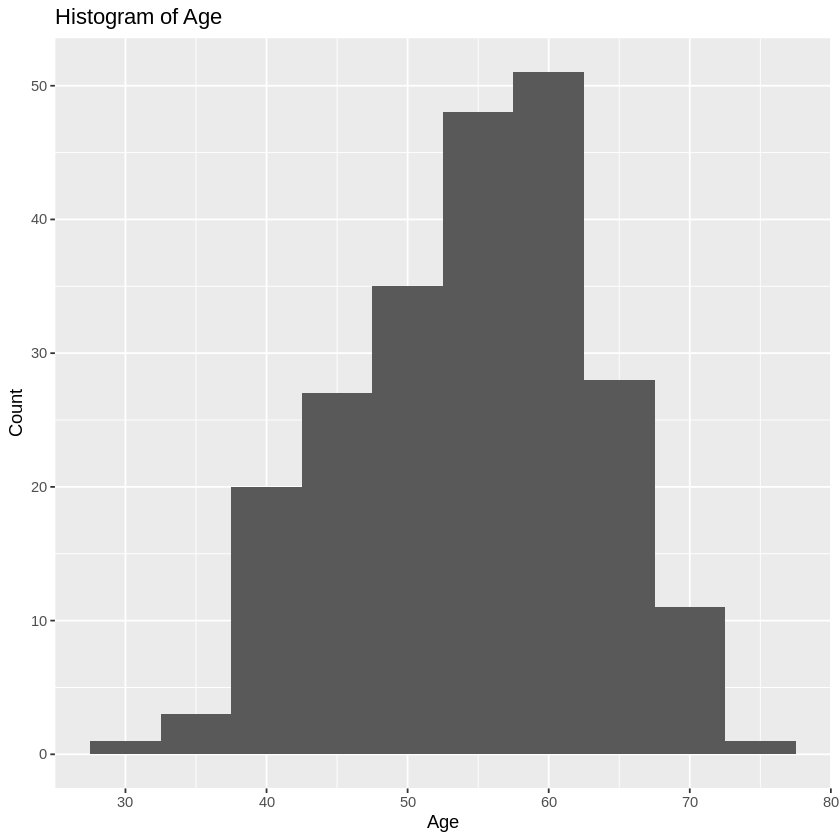

In [4]:
# 1. Distribution of Age
ggplot(train_hd, aes(x = age)) +
  geom_histogram(binwidth = 5) +
  labs(title = "Histogram of Age", x = "Age", y = "Count")

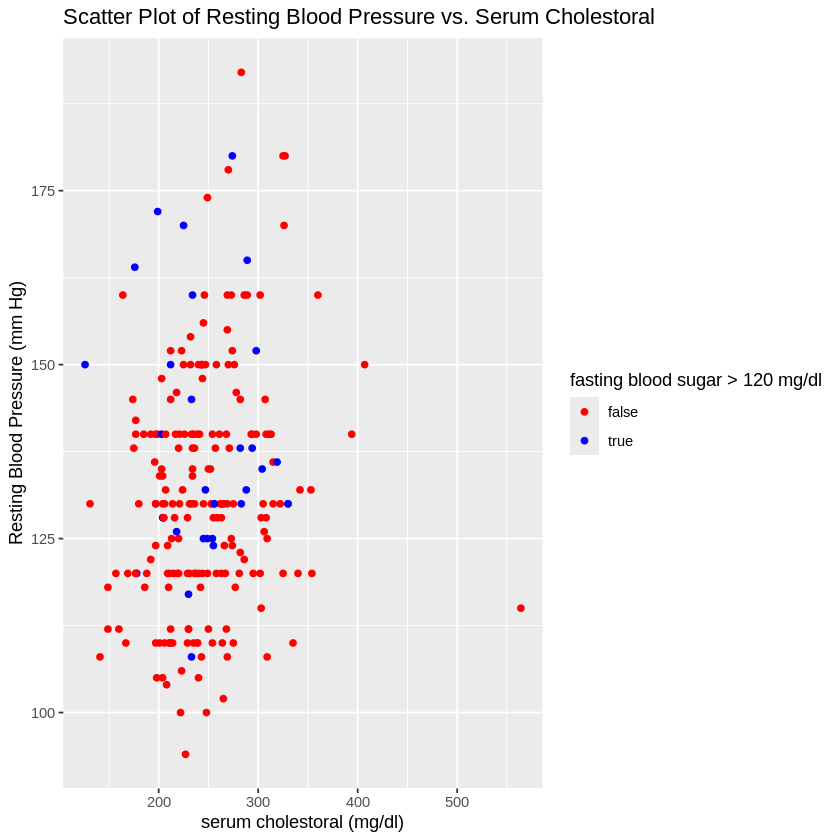

In [5]:
# 2. Resting blood pressure vs. serum cholestoral group by fasting blood sugar scatter plot
ggplot(train_hd, aes(x = chol, y = trestbps, colour = fbs)) +
  geom_point() +
  labs(title = "Scatter Plot of Resting Blood Pressure vs. Serum Cholestoral", 
       x = "serum cholestoral (mg/dl)", 
       y = "Resting Blood Pressure (mm Hg)",
      colour = "fasting blood sugar > 120 mg/dl") +
  scale_color_manual(values = c("0" = "red", "1" = "blue"), labels = c("0" = "false", "1" = "true"))

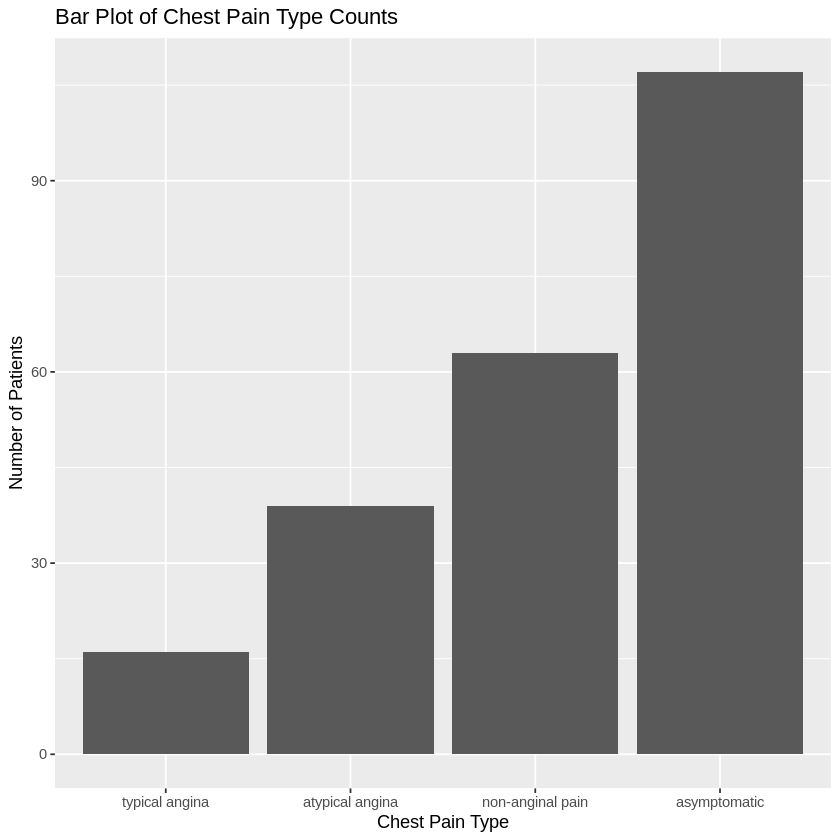

In [6]:
# 3. Chest Pain Type Bar Plot
ggplot(train_hd, aes(x = cp)) +
  geom_bar() +
  labs(title = "Bar Plot of Chest Pain Type Counts", x = "Chest Pain Type", y = "Number of Patients") +
  scale_x_discrete(labels = c("1" = "typical angina", "2" = "atypical angina", "3" = "non-anginal pain", "4" = "asymptomatic"))

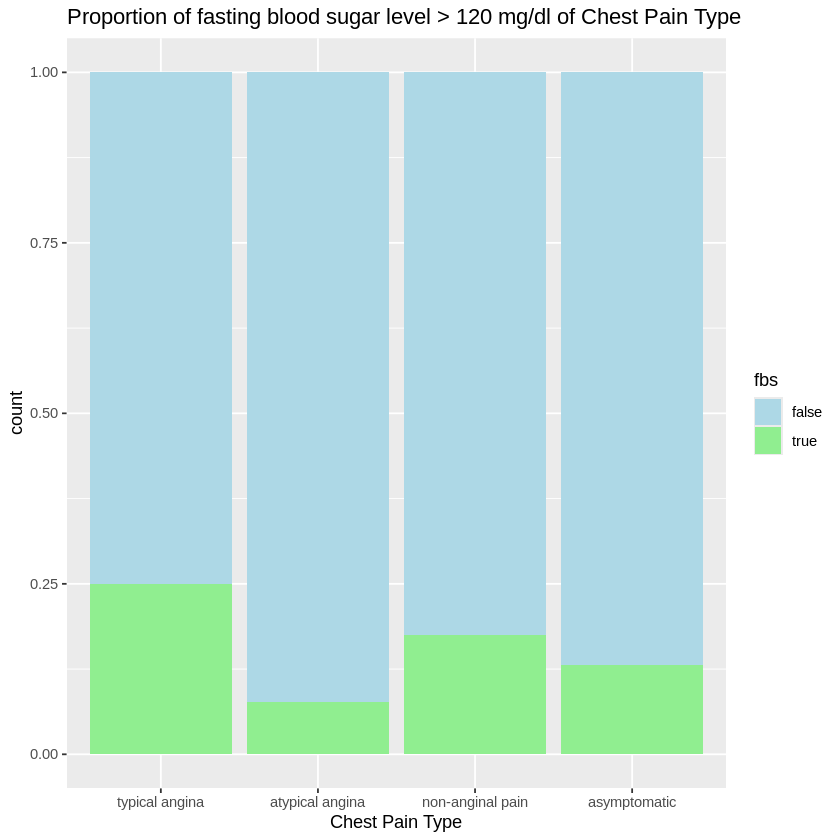

In [7]:
# 4. Proportion of fasting blood sugar level > 120 mg/dl of each type of cheast pain
ggplot(train_hd, aes(x = cp, fill = fbs)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of fasting blood sugar level > 120 mg/dl of Chest Pain Type", x = "Chest Pain Type") +
  scale_x_discrete(labels = c("1" = "typical angina", "2" = "atypical angina", "3" = "non-anginal pain", "4" = "asymptomatic")) +
  scale_fill_manual(values = c("0" = "lightblue", "1" = "lightgreen"), labels = c("0" = "false", "1" = "true"))

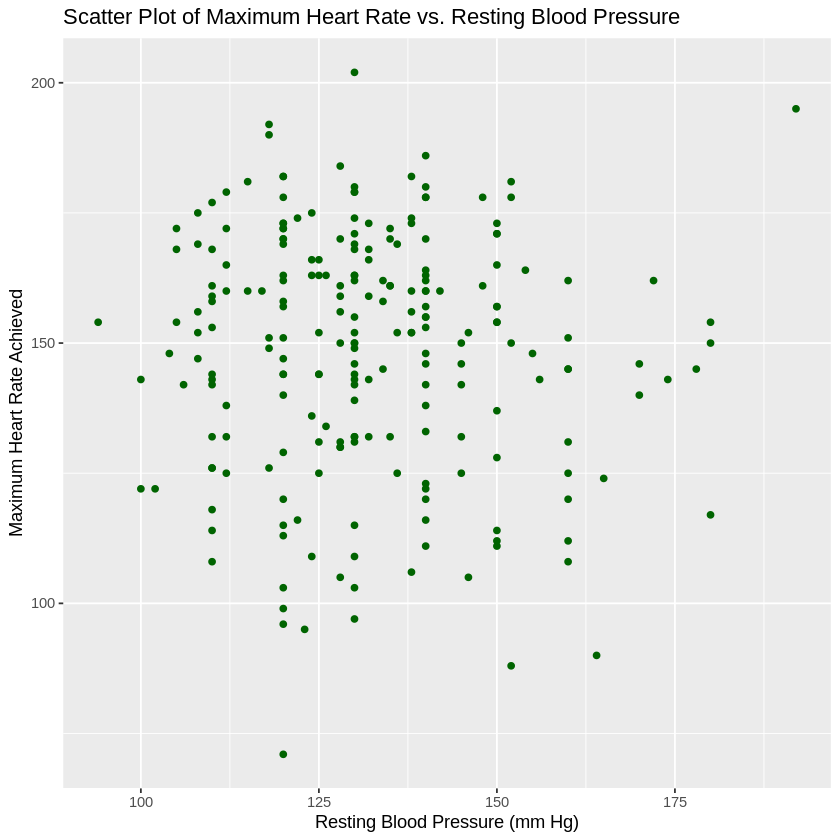

In [8]:
# 5. Max Heart Rate vs. Resting blood pressure
ggplot(train_hd, aes(x = trestbps, y = thalach)) +
  geom_point(color = "darkgreen") +
  labs(title = "Scatter Plot of Maximum Heart Rate vs. Resting Blood Pressure", x = "Resting Blood Pressure (mm Hg)", y = "Maximum Heart Rate Achieved")

## Methods

The Heart Disease Dataset utilized by this project is originally from the UCI Machine Learning Repository. In this proejct, only the processed.cleveland.data is read and it serve as the foundation of the project. From the orginal data, there are 76 variable, however, the processed data only contains 14 variable, and for this project, only 6 of features will be used for analysis and establishing the prediction model along with one targer feature. The six chosen features are age, chest pain type(cp), resting blood pressure(trestbps), serum cholestoral(chol), fasting blood sugar > 120 mg/dl(fbs), and maximum heart rate achieved(thalach), and they are chosen as these features can be representative to provide some useful information of patients body condition and are highly relevant to provide some useful indicator for predicting heart disease, and the target feature is num, which demonstrates the presence of heart disease on a scale of 4, 0 meaning absence and 1-4 means presence.

To conduct analysis, first, "?" are replaced with NAs, and the only columns with missing values are ca and thal, which are not included in the chosen features. Next, since all the columns in the data file were read as double type at first, cotegorical columns (cp, fbs) needs to be tranformed to factor type using ```as.factor()``` and ```mutate()```. With these steps, the data set now is clean and tidy where each rows is just a single observation (patient) and each column represents one variable. Then it is ready for further analysis and data training.

It is important that before using the data to fit the model, the data set must be split into two sets, one for training and one for testing, so that the golden rule of machine learning is not violated and the model will not be overfitted with test data and give more reliable and insightful result on how well the model perform in prediction. In this project, the orginal data read from the file is split by ``` initial_split() ``` with 75% trainging data set and 25% testing data, and strata are specified as num for the target feature.

By the EDA step above, the ```summary() ``` function show us some basic statitical information about each feature of the traing data such as mean, max, min for numeric clomuns and the counts for categorical columns. The information helps to better understand the data. Moreover, some visualizations are plotted to demonstrante the distribution, patterns, or potential relationships between some of the variables. 

Before fitting the model, some transformations and scalings are required for numeric columns so data with different unit is standarlized and weighed equally. Then the data can be fitted into the model to get the results. Cross validation and hyperparameter optimization may also be needy.

To visulize the result, plots for cross-validation scores will be shown to access how well does the model perform. Also, confusion matrix is also useful to provide some meaningful metrics and numbers such as accuracy, recall, and precision for possible bias and improvements. Plots on true value vs. predicted value can also illustrate the result of the prediction.

## Expected Outcomes and Significance

It is anticipated that the model can efficient identify the presence of heart disease base on the six features selected with a high and acceptable test accuracy. It should also conclude some correlation between the features and the presence of heart disease, where for the six features selected in the project, it should demonstrate that older age, higher resting blood pressure, higher cholestral, fasting blood suger > 120 mg/dl , and certain chest pain have higher risk of casuing heart disease and are more likely to predict presence of heart disease.

It is significant if the predicting model of the project is sucessfully proven to be accurate and efficient, it could serve as a helping tool for the doctors and enhance early diagnosis and treatment of heart disease, potentially saving lives and improving patient outcomes. This could lead to better resource allocation in hospitals by identifying high-risk patients who need immediate attention. Additionally, the findings might inform the public on strategies aimed at reducing the incidence of heart disease through targeted prevention and education programs.

Moreover, for future researches that are interested in releated fields, some worthy questions that can be probe into are:

- Are there any alogorithm or model can give better accuracy and efficiency
- How well the model performs across different populations or regions
- Which of the features is the most important factor for predicting heart disease
- Based on predictive factors, what preventive measures can be most effective?